## 0. 课程大纲

### 0.1 Hough直线检测
```python
cv.HoughLines(img, rho, theta, thresh)
lines = cv.HoughLinesP(E, rho, theta, thresh, minLineLength=26, maxLineGap=3)
```

### 0.2 Hough圆检测——标准方法
OpenCV未实现

### 0.3 Hough圆检测——梯度法
```python
circles = cv.HoughCircles(img_gray, cv.HOUGH_GRADIENT, dp=1.5, minDist=20,
                             param1=400, param2=45, 
                             minRadius=10, maxRadius=30)
cv.HoughCircles(image, method, dp, minDist, param1, param2, minRadius, maxRadius)
image: 灰度图（该函数里面会自动进行Canny边缘检测，检测阈值间 param1）
method: 只提供霍夫梯度法， cv.HOUGH_GRADIENT, cv.HOUGH_GRADIENT_ALT
dp: 图像分辨率与累加器分辨率之比，可取 dp=1~2
minDist: 两个不同圆圆心之间的最小距离
param1: 用于Canny的边缘阀值上限，下限被置为上限的一半
param2: cv.HOUGH_GRADIENT 方法的累加器阈值，阈值越小，检测到的圆圈越多。
    选择 cv.HOUGH_GRADIENT_ALT 方法时，该参数取 0-1 之间，用于衡量圆的完美度，最完美时取 1.
minRadius: 最小圆半径
maxRadius: 最大圆半径
```


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 14. Hough变换

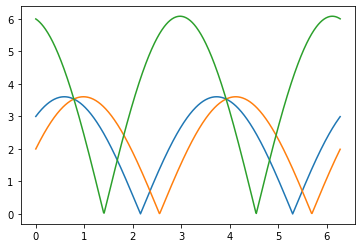

In [3]:
x = np.arange(0, 2*np.pi, 0.01)
y = np.abs(2 * np.sin(x) + 3 * np.cos(x))
y2 = np.abs(3 * np.sin(x) + 2 * np.cos(x))
y3 = np.abs(-1 * np.sin(x) + 6 * np.cos(x))

plt.plot(x, y, x, y2, x, y3)
plt.show()

#### Hough直线检测原理
$$
\begin{aligned}
\rho &= r cos(\phi-\theta) \\
&= r cos\phi cos\theta + r sin\phi sin\theta \\
&= x cos\theta + y sin\theta
\end{aligned}
$$
对式子
$$
\rho = xcos\theta + ysin\theta \tag{*}
$$
当给定 $x, y$时，确定了一条三角函数曲线，给定角度 $\theta$，总有对应的 $\rho$ 与之对应。

满足$(*)$式的点 $(x, y)$位于一条直线上，反之，位于一条直线上的点 $(x,y)$ 都对应一组 $(\theta, \rho)$，如果多个点位于同一条直线，那么在新的极坐标空间有交点。
对直角坐标空间的一个点，也可以有

对直角坐标空间上的每一个点 $(x,y)$，可以作出极坐标空间的一条曲线。在直角坐标系上中，位于同一条直线上的一系列点，在极坐标空间都会交于同一点，这是很好解释的，因为位于同一条直线，就意味着存在一个共同的点对 $(\rho, \theta)$。

例如，对在同一条直线 $y = x+1$ 上的点 $(-2, -1), (-1, 0), (0,1), (1,2)$，代入 $(*)$ 式，分别确定以下四条曲线
$$
\rho = -2cos\theta + sin\theta\\
\rho = -cos\theta\\
\rho = sin\theta\\
\rho = cos\theta + 2sin\theta\\
$$
用直角坐标和极坐标分别做出下列曲线，

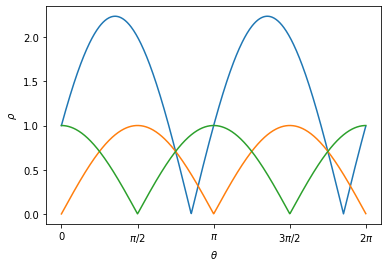

In [106]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 2*np.pi, 0.01)  
r1 = np.abs(np.cos(t) + 2*np.sin(t)) #(-2,1)
r2 = np.abs(np.sin(t)) #(0,1)
r3 = np.abs(-np.cos(t)) #(-1,0)

plt.plot(t, r1, t, r2, t, r3)
plt.xticks([0, np.pi/2, np.pi, 3/2*np.pi, 2*np.pi], ['0', '$\pi/2$', '$\pi$','$3\pi/2$', '$2\pi$'])
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\rho$')
plt.show()

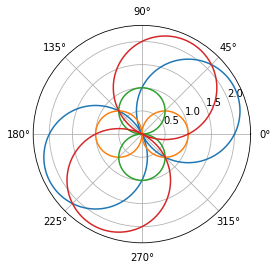

In [5]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 2*np.pi, 0.01)  
r1 = np.abs(-2*np.cos(t) - np.sin(t)) #(-2,1)
r2 = np.abs(-np.cos(t)) #(-1,0)
r3 = np.abs(np.sin(t)) #(0,1)
r4 = np.abs(np.cos(t) + 2*np.sin(t)) #(1,2)

ax1= plt.subplot(111, projection='polar')
ax1.plot(t, r1, t, r2, t, r3, t, r4)
plt.show()

### 14.1 Hough直线检测

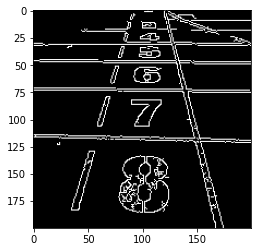

In [140]:
bgr = cv.imread("pic/road200x200.jpg")
I = cv.cvtColor(bgr, cv.COLOR_BGR2GRAY)
E = cv.Canny(I, 100, 400, 0)
show(E)

10


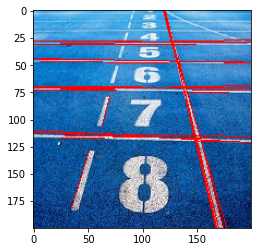

In [154]:
lines = cv.HoughLines(E, 2, np.pi/180, 140)
print(len(lines))
length = I.shape[0] + I.shape[1]

for (rho, theta) in lines.squeeze():
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = rho * a
    y0 = rho * b
    x1 = int(x0 + length*(-b))
    y1 = int(y0 + length*(a))
    x2 = int(x0 - length*(-b))
    y2 = int(y0 - length*(a))
    
    cv.line(bgr, (x1, y1), (x2, y2), (0,0,255), 1)
    
show(bgr)

20


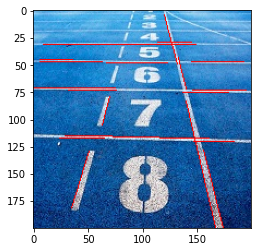

In [147]:
bgr = cv.imread("pic/road200x200.jpg")
I = cv.cvtColor(bgr, cv.COLOR_BGR2GRAY)
E = cv.Canny(I, 100, 400, 0)

lines = cv.HoughLinesP(E, 2, np.pi/180, 100, minLineLength=26, maxLineGap=3)
print(len(lines))

for line in lines.squeeze():
    x1, y1, x2, y2 = line
    cv.line(bgr, (x1, y1), (x2, y2), (0,0,255), 1)
    
show(bgr)

## Hough直线检测实现

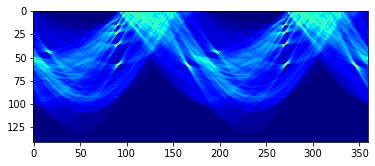

In [44]:
bgr = cv.imread("pic/road200x200.jpg")
I   = cv.cvtColor(bgr, cv.COLOR_BGR2GRAY)

E = cv.Canny(I, 100, 400)

dr, dt, thresh = 2, np.pi / 180, 140
h, w = E.shape
rmin, rmax = 0, np.sqrt(h**2 + w**2)
tmin, tmax = 0, 2*np.pi

nrb = int((rmax - rmin)/dr)# n rho bins
ntb = int((tmax - tmin)/dt)
N = np.zeros((nrb, ntb), dtype=np.int32)

ys, xs = np.where(E == 255)

thetas = np.arange(tmin, tmax, dt)
for (x,y) in zip(xs, ys):
    rhos = np.abs(x*np.cos(thetas) + y*np.sin(thetas))
    rhos = np.int32(np.round(rhos / dr))
    ts = np.int32(np.round(thetas / dt))
    N[rhos, ts] += 1
#     N[rhos, range(len(thetas))] += 1
    
plt.imshow(N, cmap='jet')
plt.show()

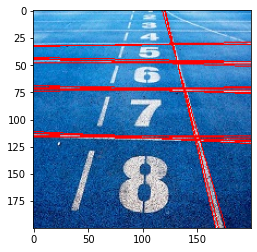

In [45]:
bgr = cv.imread("pic/road200x200.jpg")

rs, ts = np.where(N > thresh)
ts = ts * dt
rs = rs * dr

for (rho, theta) in zip(rs, ts):
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 2000*(-b))
    y1 = int(y0 + 2000*(a))
    x2 = int(x0 - 2000*(-b))
    y2 = int(y0 - 2000*(a))
    
    cv.line(bgr, (x1, y1), (x2, y2), (0,0,255), 1)
    
show(bgr)

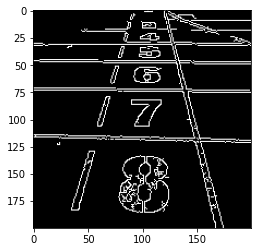

In [23]:
show(E)

### 14.2 Hough圆检测

```python
cv.HoughCircles(image, method, dp, minDist, param1, param2, minRadius, maxRadius)
image: 灰度图（该函数里面会自动进行Canny边缘检测，检测阈值间 param1）
method: 只提供霍夫梯度法， cv.HOUGH_GRADIENT, cv.HOUGH_GRADIENT_ALT
dp: 图像分辨率与累加器分辨率之比，通常可取 dp=1.5
minDist: 两个不同圆圆心之间的最小距离
param1: 用于Canny的边缘阀值上限，下限被置为上限的一半
param2: cv.HOUGH_GRADIENT 方法的累加器阈值，阈值越小，检测到的圈子越多。
    选择 cv.HOUGH_GRADIENT_ALT 方法时，该参数取 0-1 之间，用于衡量圆的完美度，最完美时取 1.
minRadius: 最小圆半径
maxRadius: 最大圆半径
```

1


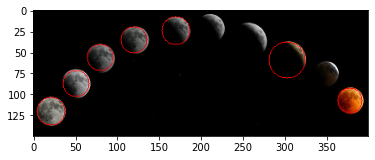

In [56]:
import numpy as np
import cv2 as cv

img = cv.imread('pic/moons150x400.jpg')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# dp放缩图片的倍数
circles = cv.HoughCircles(img_gray, cv.HOUGH_GRADIENT, dp=1.5, minDist=20,
                             param1=400, param2=40, 
                             minRadius=10, maxRadius=30)
print(len(circles))
circles = circles.astype(np.int)

for i in circles[0, :]:
    cv.circle(img, (i[0], i[1]), i[2], (0, 0, 255), 1)

show(img)

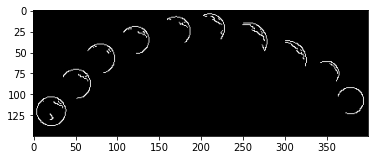

In [50]:
show(cv.Canny(img_gray, 200, 400))

In [86]:
img2 = cv.imread('pic/moons150x400.jpg')

In [87]:
cv.imwrite('pic/moons_hough_circle.jpg', np.r_[img2, img])

True

## Hough圆检测实现

$$
(x-a)^2 + (y-b)^2 = r^2
$$
$$
(a-x)^2 + (b-y)^2 = r^2
$$

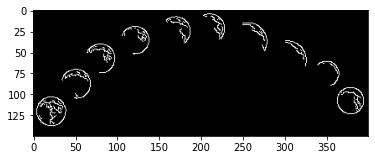

In [133]:
bgr = cv.imread('pic/moons150x400.jpg')
I = cv.cvtColor(bgr, cv.COLOR_BGR2GRAY)

E = cv.Canny(I, 90, 300)
show(E)

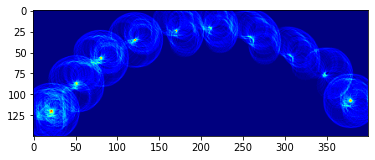

Wall time: 1.08 s


In [137]:
%%time

h, w = E.shape
rmin, rmax, dr = 16, 19, 1 # 均为整数
nk = int((rmax - rmin) / dr)

ys, xs = np.where(E == 255)
N = np.zeros((h, w, nk))

for (a,b) in zip(xs, ys):
    for r in np.arange(rmin, rmax, dr):
        cir = cv.circle(np.zeros_like(E), (a,b), r, 255, 1)
        bs, aas = np.where(cir == 255)
        N[bs, aas, r-rmin] += 1
        
plt.imshow(N[:,:,1], cmap='jet')
plt.show()

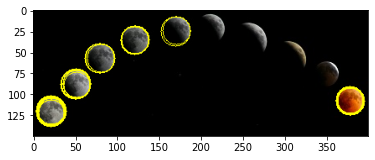

In [136]:
thres = N.max() / 2
xs, ys, rs = np.where(N >= thres)

img = cv.imread('pic/moons150x400.jpg')
[cv.circle(img, (y,x), r+rmin, (0,255,255), 1) for (x,y,r) in zip(xs,ys,rs)]
show(img)

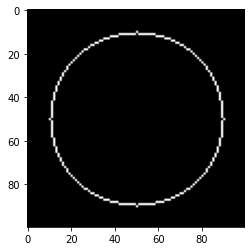

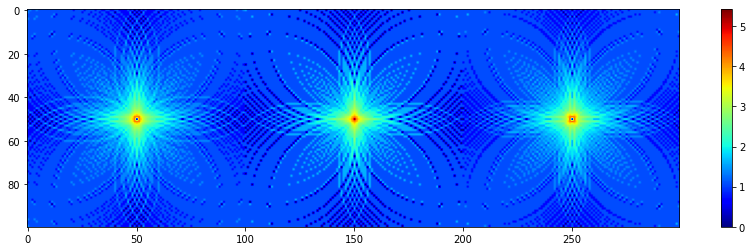

In [174]:
# 完整的一个圆演示

E = np.ones((100, 100), np.uint8)
cv.circle(E, (50, 50), 40, 255, 1)

h, w = E.shape
rmin, rmax, dr = 39, 42, 1
nk = int((rmax - rmin) / dr) + 1

ys, xs = np.where(E == 255)

N = np.zeros((h, w, nk))

end = False
for (a,b) in zip(xs, ys):
    for r in np.arange(rmin, rmax, dr):
        cir = cv.circle(np.zeros_like(E), (a,b), r, 255, 1)
        bs, aas = np.where(cir == 255)
        N[bs, aas, r-rmin] += 1
        
show(E)
plt.figure(figsize=(15, 4))
plt.imshow(np.log(np.c_[N[:,:,0], N[:,:,1], N[:,:,2]] + 1), cmap='jet')
plt.colorbar()
plt.show()

## Hough圆检测——梯度法

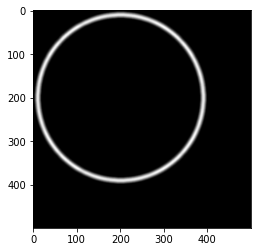

In [172]:
bgr  = cv.imread('pic/moons150x400.jpg')
I    = cv.cvtColor(bgr, cv.COLOR_BGR2GRAY)
h, w = I.shape
rmax = w + h

E = np.ones((500, 500), np.uint8)
cv.circle(E, (200, 200), 190, 255, 5)
I = cv.blur(E, (10,10))
show(I)
# E  = cv.Canny(I, 90, 300)
Ix = cv.Sobel(I, cv.CV_64F, 1, 0)
Iy = cv.Sobel(I, cv.CV_64F, 0, 1)
Ir = np.sqrt(Ix**2 + Iy**2) + 1e-9
Ix /= Ir
Iy /= Ir

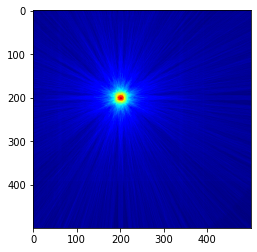

In [173]:
ys, xs = np.where(E == 255)

N = np.zeros_like(I, dtype=np.int64)

for (x, y) in zip(xs, ys):
    gx = Ix[y, x]
    gy = Iy[y, x]
    startx = int(x - gx * rmax)
    starty = int(y - gy * rmax)
    endx = int(x + gx * rmax)
    endy = int(y + gy * rmax)
    line = cv.line(np.zeros_like(I), (startx, starty), (endx, endy), 255, 1)
    bs, aas = np.where(line == 255)
    N[bs, aas] += 1
    
plt.imshow(N, cmap='jet')
plt.show()

In [167]:
np.where(N == N.max())

(array([203], dtype=int64), array([203], dtype=int64))

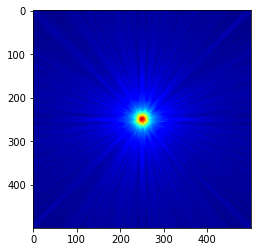

In [164]:
plt.imshow(N, cmap='jet')
plt.show()

In [143]:
thresh1 = 28
thresh2 = 20

ys, xs = np.where(N > thresh1)
rmin, rmax, dr = 16, 19, 1

yxr = []
for (x, y) in zip(xs, ys):
    for r in range(rmin, rmax, dr):
        circ = cv.circle(np.zeros_like(I), (x,y), r, 255, 1)
        sect = cv.bitwise_and(circ, E)
        if sect[sect == 255].size > thresh2:
            yxr.append((y, x, r))

len(yxr)

67

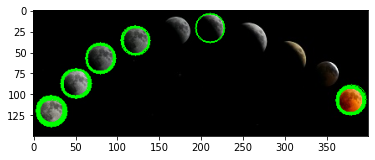

In [144]:
bgr  = cv.imread('pic/moons150x400.jpg')
[cv.circle(bgr, (x,y), r, (0, 255, 0), 1) for (y,x,r) in yxr]

show(bgr)

In [9]:
I = np.zeros((200,200), np.uint8)
cv.circle(I, (100,100), 80, 255, 3)
I = cv.blur(I, (9,9))
E = cv.Canny(I, 100, 200)
h, w = E.shape

rmin, rmax, dr = 75, 85, 1

Ix = cv.Sobel(I, cv.CV_64F, 1, 0)
Iy = cv.Sobel(I, cv.CV_64F, 0, 1)
Ir = np.sqrt(Ix**2 + Iy**2)
Ix /= (Ir + 1e-5)
Iy /= (Ir + 1e-5)

N  = np.zeros((h, w), np.int32)
lmax = N.shape[0] + N.shape[1]

ys, xs = np.where(E == 255)
for (x, y) in zip(xs, ys):
    px = Ix[y, x]
    py = Iy[y, x]
    
    x1 = int(x + px*lmax)
    y1 = int(y + py*lmax)
    x2 = int(x - px*lmax)
    y2 = int(y - py*lmax)
    
    line = np.zeros(N.shape, np.uint8)
    cv.line(line, (x1, y1), (x2, y2), 255, 1)
    
    bs, aas = np.where(line == 255)
    N[bs, aas] += 1

thresh1 = N.max()
thresh2 = 100

bs, aas = np.where(N >= thresh1)
abr = []

for (a,b) in zip(aas, bs):
    for r in range(rmin, rmax, dr):
        circ = np.zeros(I.shape, np.uint8)
        cv.circle(circ, (a,b), r, 255, 1)
        sect = cv.bitwise_and(E, circ)
        num  = (sect == 255).sum()
        if num > thresh2:
            abr.append((a,b,r))
            
abr

[(100, 100, 76), (100, 100, 77), (100, 100, 84)]

In [8]:
sect.max()

255